In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
sys.path.append('..')

## Calculating Vaccine Coverage for Municipalities

In [3]:
def coverage_age(p,e):
    return (1 +((1-e)*((1/p) -1)))**-1

In [4]:
def probability_age(c,e):
    return (((1-c)/(1-e))*(1/c) + 1)**-1

### 10 municipalities with the most cases

In [5]:
first_10 = [355030., 130260., 150140., 410690., 150080., 351880., 130250.,
       330455., 351630., 160030.]

In [6]:
df_mun = pd.read_csv('../Data/analyzed/age_vaccine_municipalities.csv')
mun_path = '../Data/municipalities.csv'
mun_file = pd.read_csv(mun_path)
mun_file['codigo'] = mun_file['municipio'].astype(str).str[:6].astype(int)
mun_file = mun_file[['municipio','name','codigo']]
df_mun = df_mun.merge(mun_file, how = 'left', left_on = 'ID_MN_RESI', right_on = 'codigo')

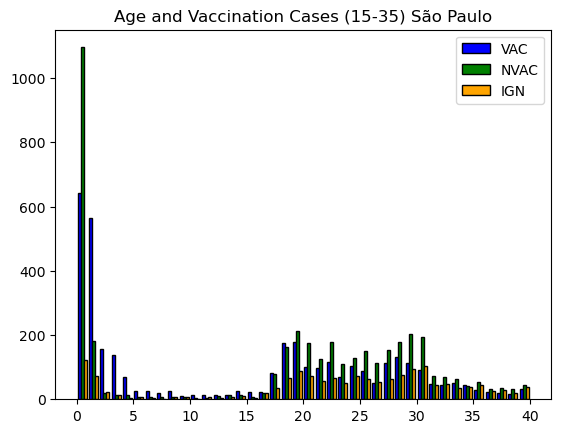

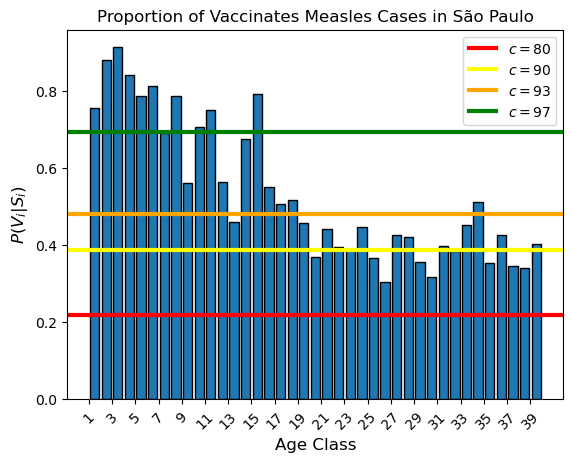

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


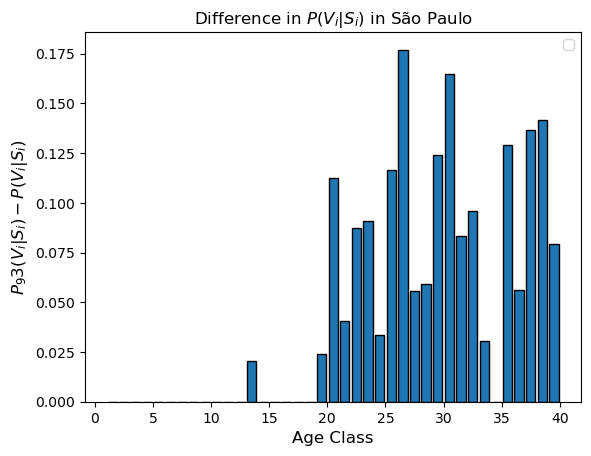

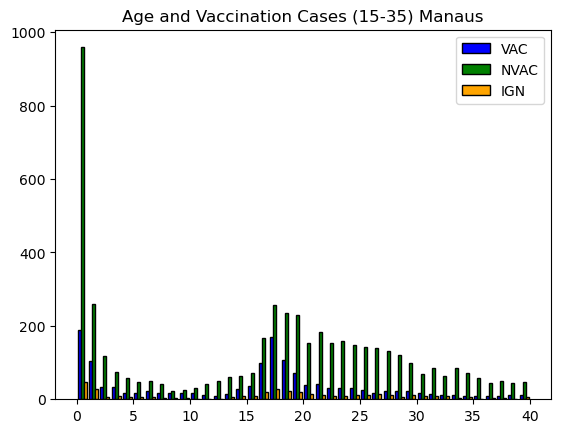

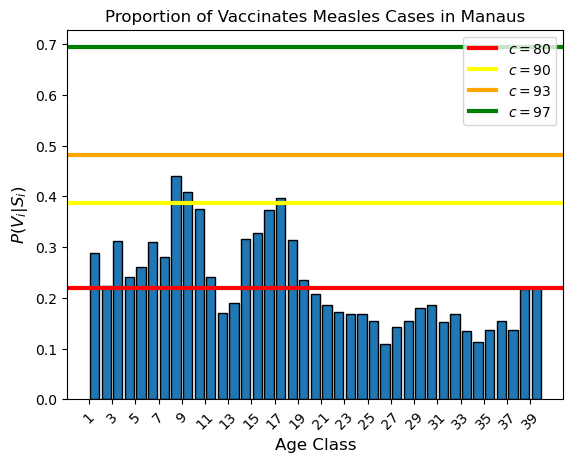

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


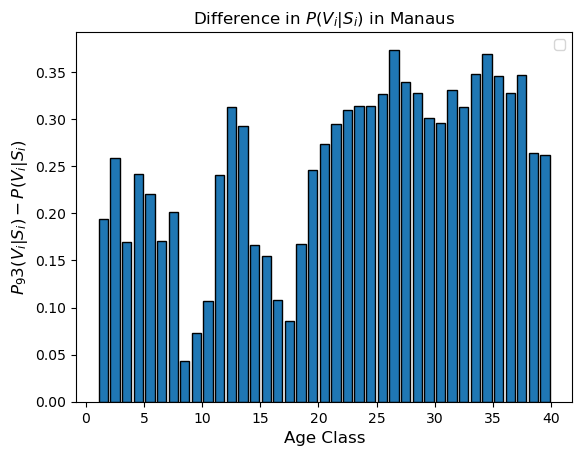

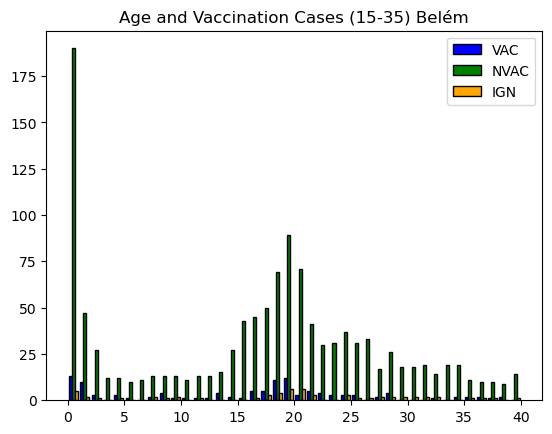

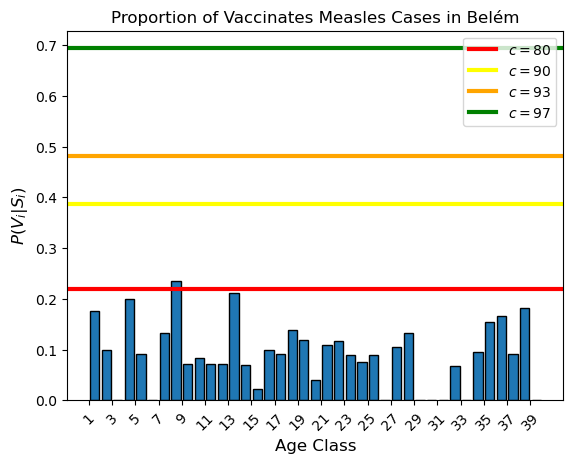

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


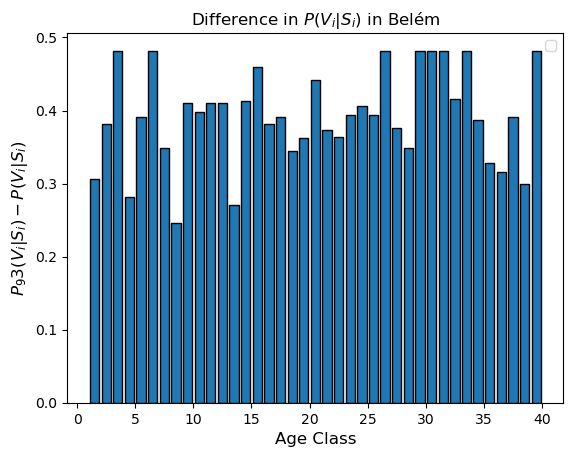

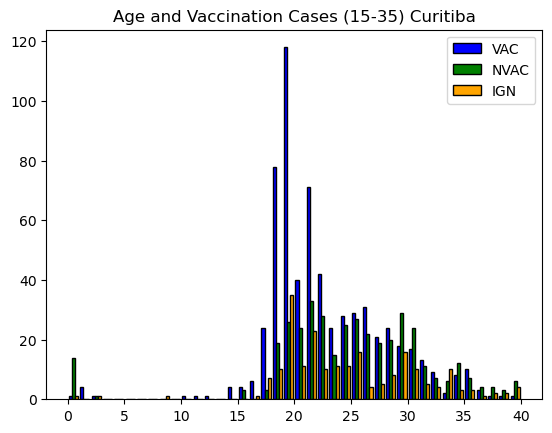

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_18436\3493243092.py:24: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)


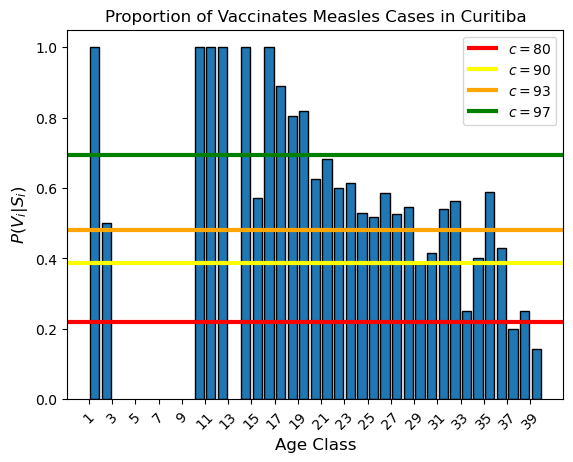

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


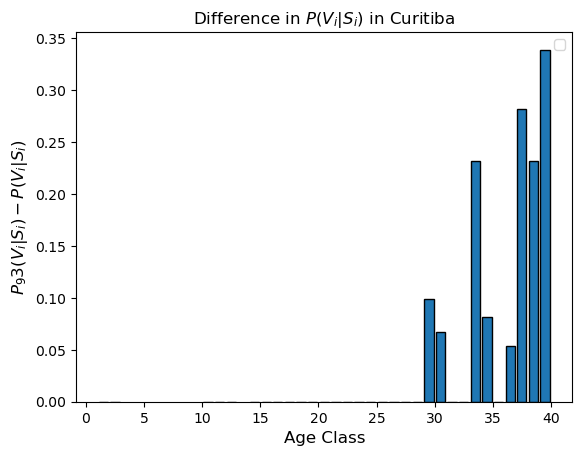

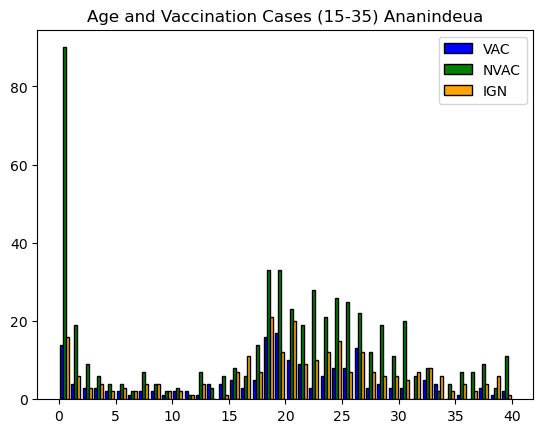

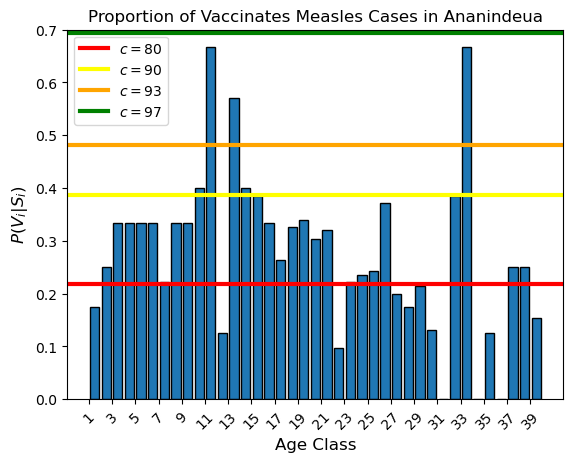

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


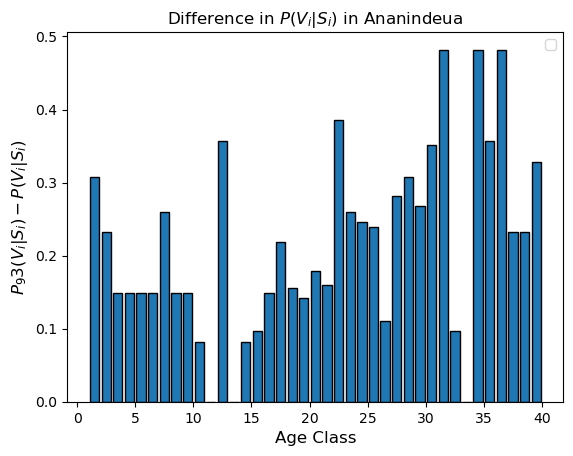

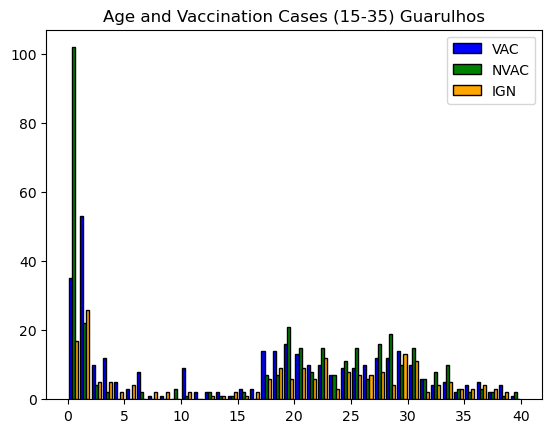

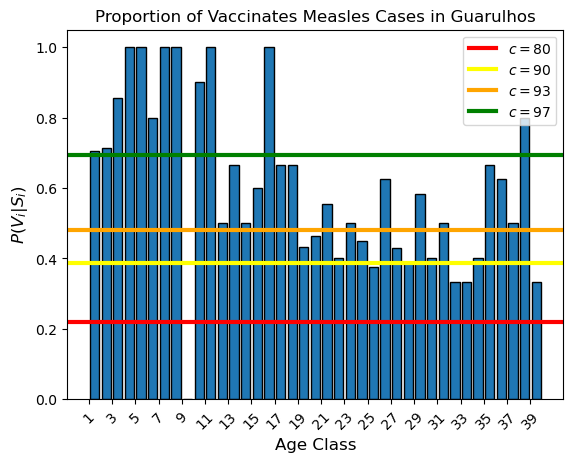

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


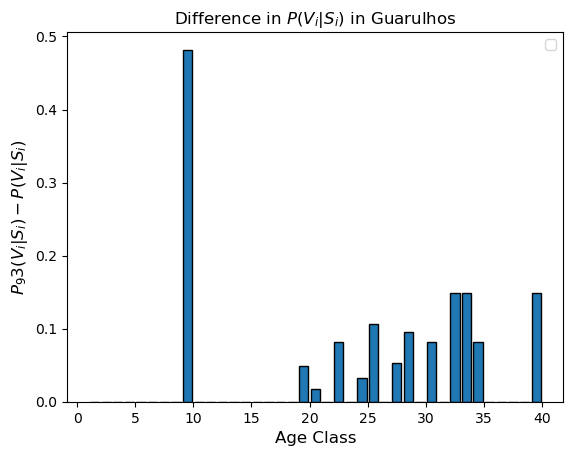

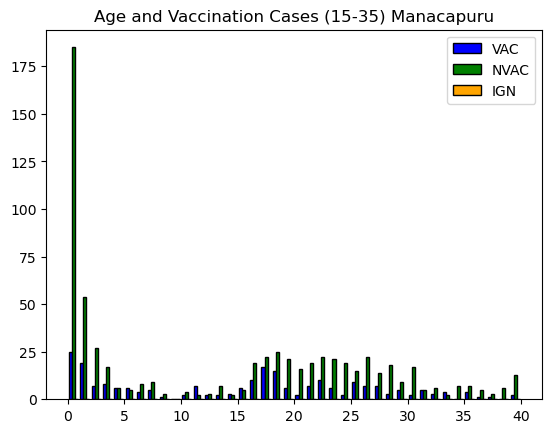

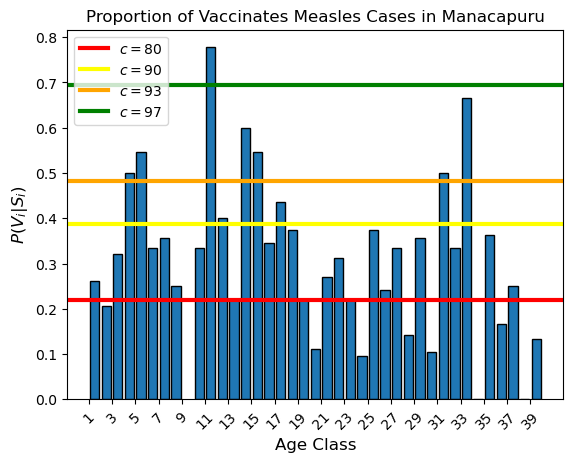

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


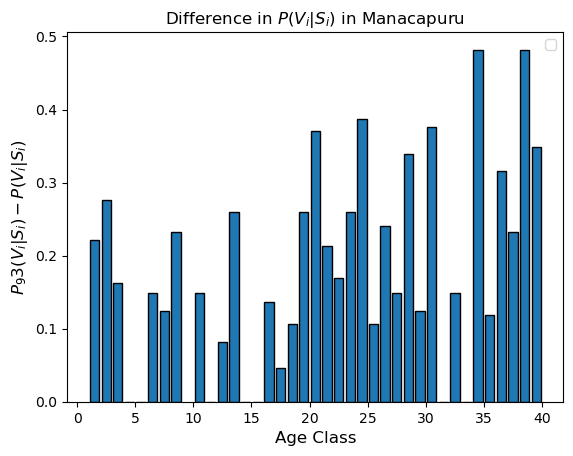

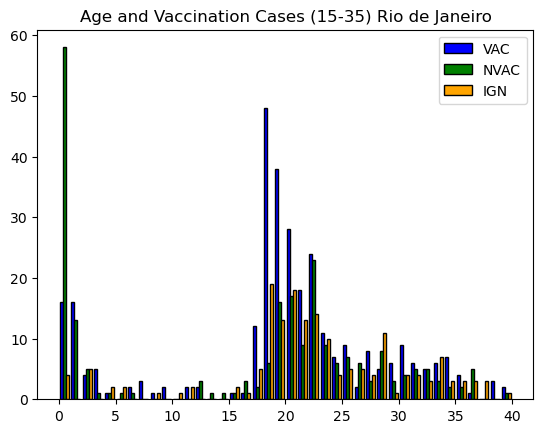

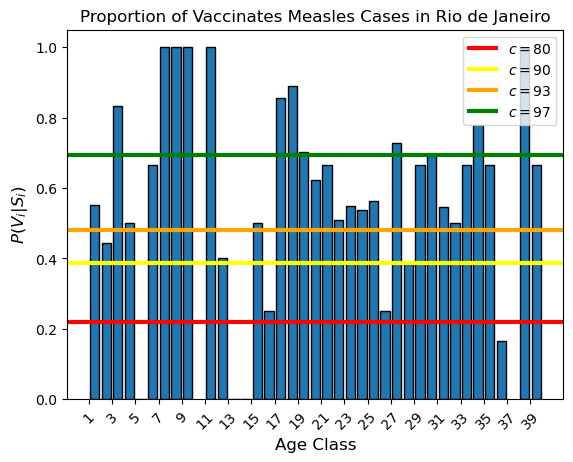

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


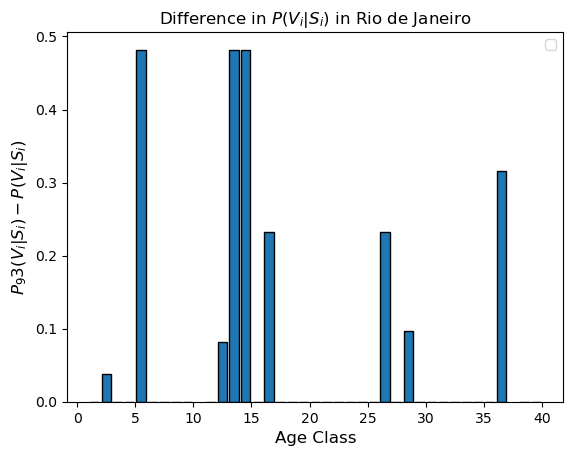

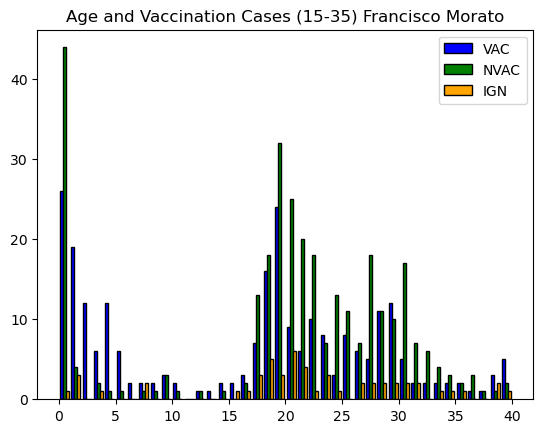

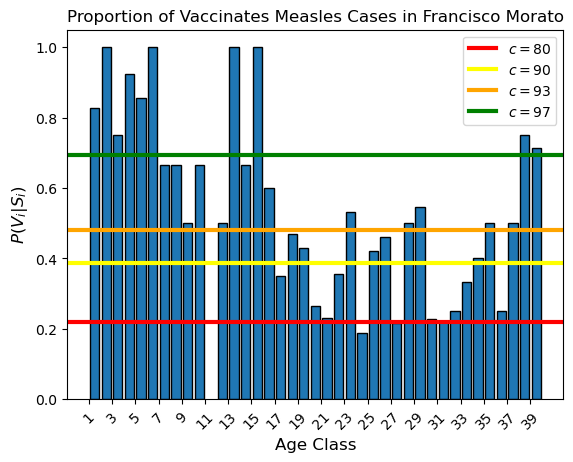

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


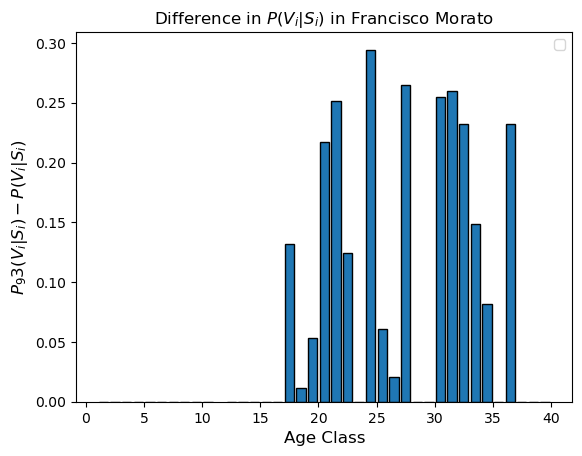

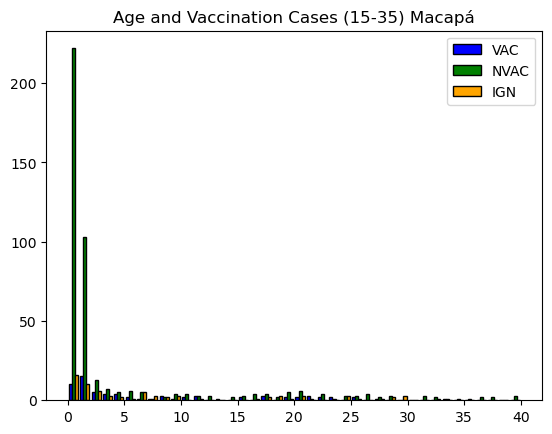

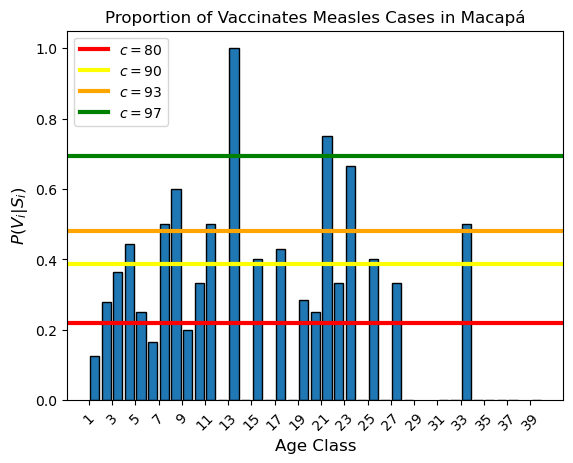

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


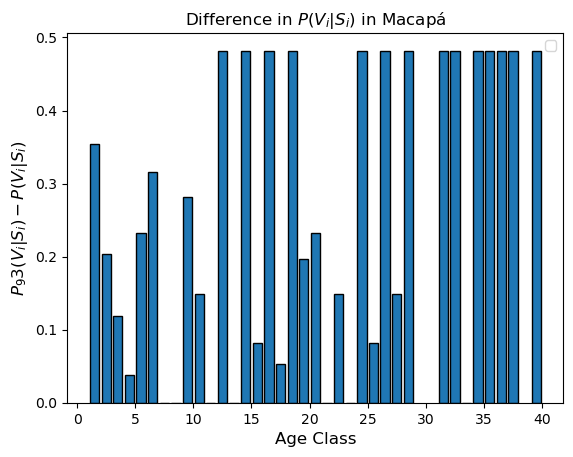

In [7]:
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs = vacs[1:]
    nvacs = nvacs[1:]
    ign = ign[1:]
    p_vacs = vacs/(vacs+nvacs)
    p_vacs_93 = (probability_age(0.93,0.93))
    p_vacs_90 = (probability_age(0.9,0.93))
    p_vacs_80 = (probability_age(0.80,0.93))
    p_vacs_97 = (probability_age(0.97,0.93))
    plt.bar(np.arange(1,max_age,1) + 0.5,height = p_vacs, edgecolor = 'k')
    plt.axhline(p_vacs_80, color ='red', linewidth = 3, label = r'$c = 80%$')
    plt.axhline(p_vacs_90, color = 'yellow', linewidth = 3, label = r'$c = 90%$')
    plt.axhline(p_vacs_93, color = 'orange', linewidth = 3, label = r'$c = 93%$')
    plt.axhline(p_vacs_97, color = 'green', linewidth = 3, label = r'$c = 97%$')
    plt.xticks(np.arange(1,max_age,2), rotation = 45)
    plt.xlabel('Age Class', fontsize = 12)
    plt.ylabel(r'$P(V_{i}|S_i)$', fontsize = 12)
    plt.title('Proportion of Vaccinates Measles Cases in '+mun_name)
    plt.legend()
    plt.show()
    p_excess = p_vacs_93 - p_vacs
    f = lambda x: 0 if x < 0 else x
    p_excess = [f(i) for i in p_excess]
    plt.bar(np.arange(1,max_age,1) + 0.5,height = p_excess, edgecolor = 'k')
    plt.xlabel('Age Class', fontsize = 12)
    plt.ylabel(r'$P_93(V_{i}|S_i) - P(V_{i}|S_i)$', fontsize = 12)
    plt.title('Difference in '+r'$P(V_i|S_i)$ '+'in '+mun_name)
    plt.legend()
    plt.show()

### Repeating including ignored cases (best case scenario: all ignored are vaccinated)

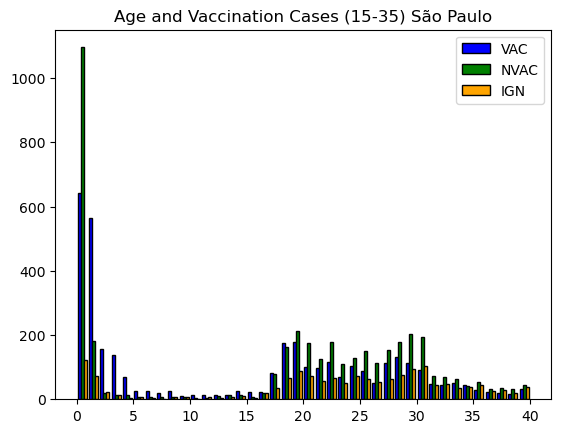

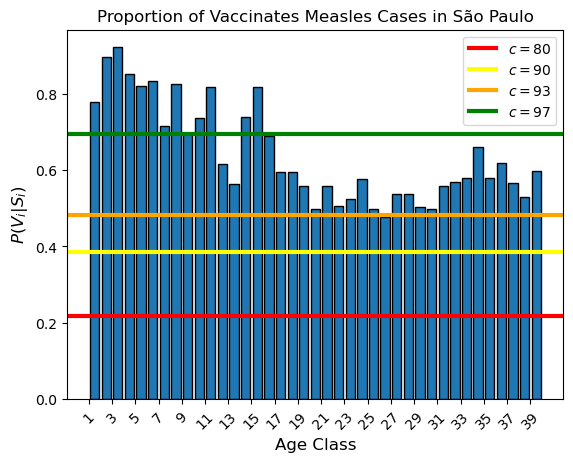

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


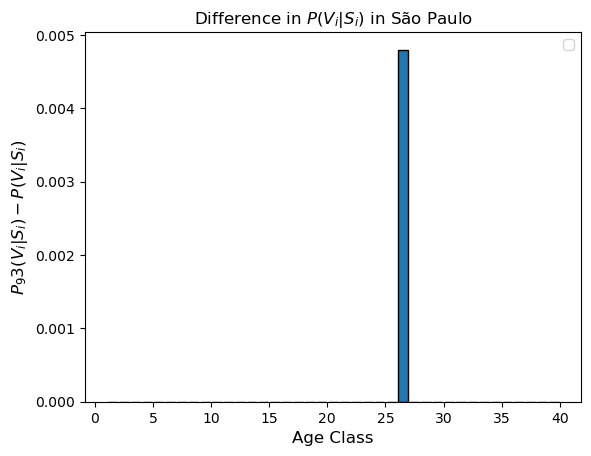

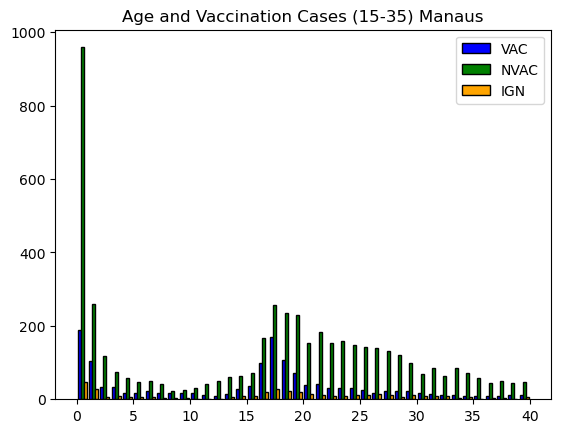

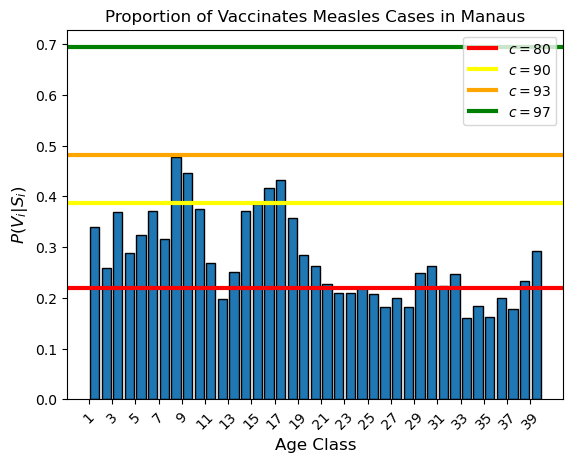

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


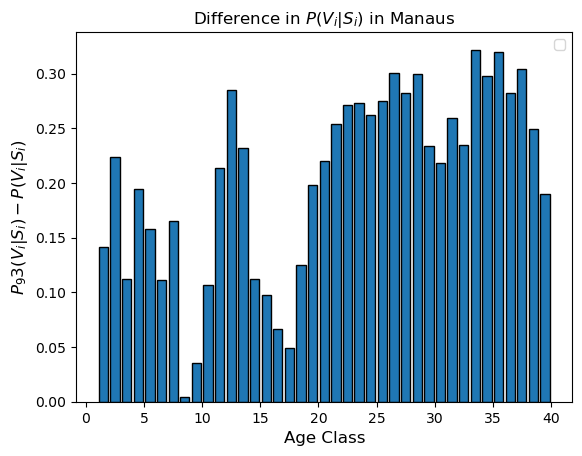

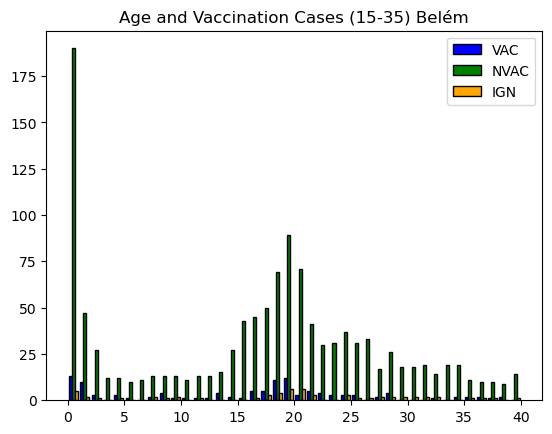

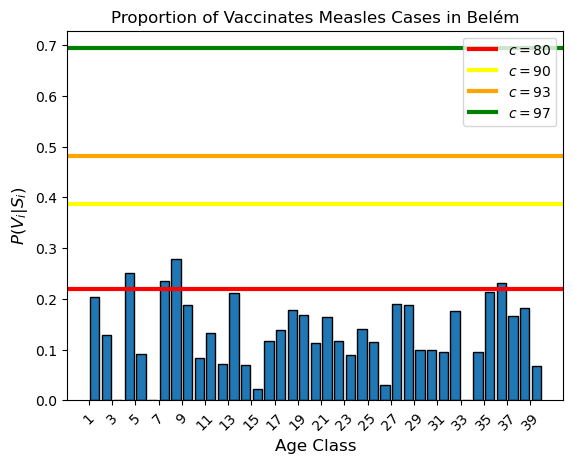

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


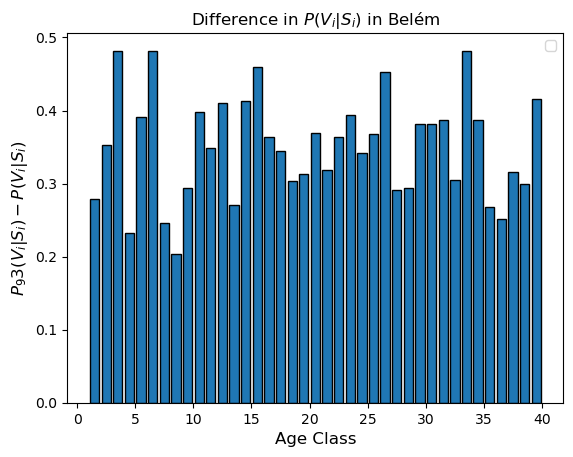

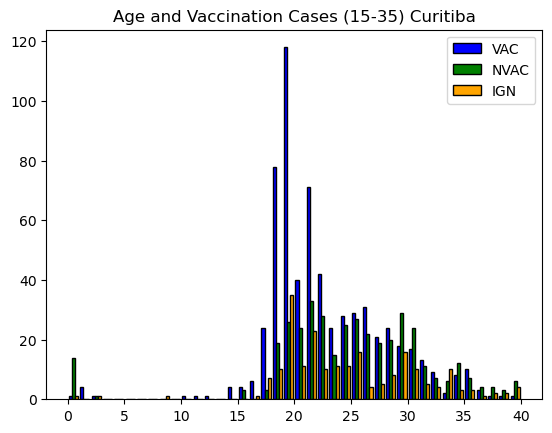

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_18436\4251559046.py:25: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)


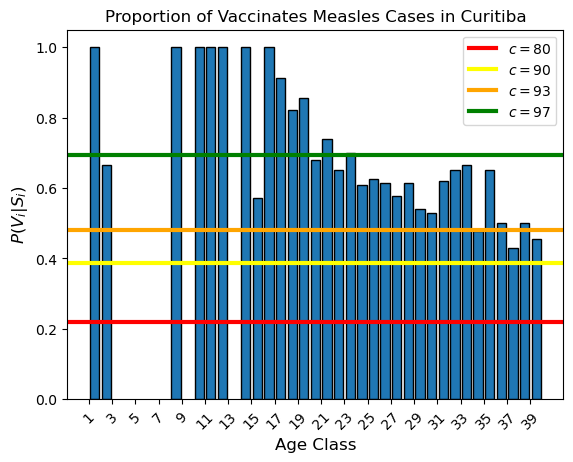

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


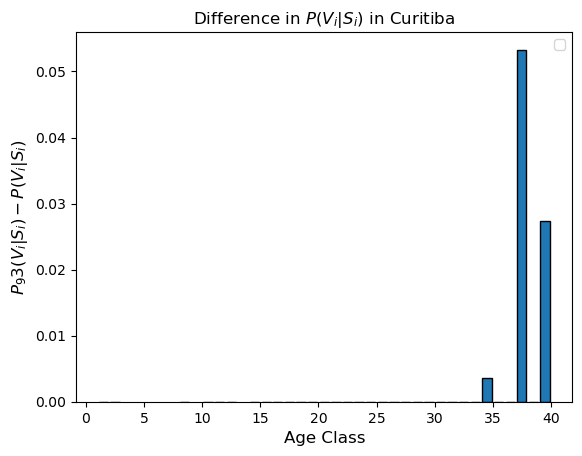

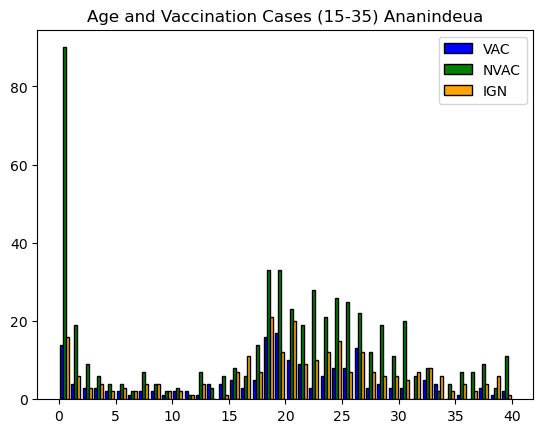

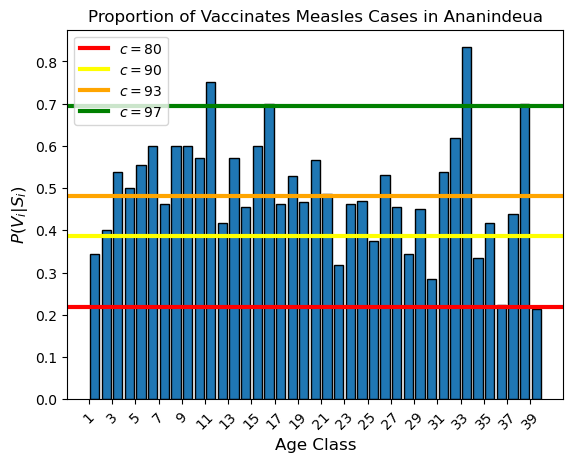

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


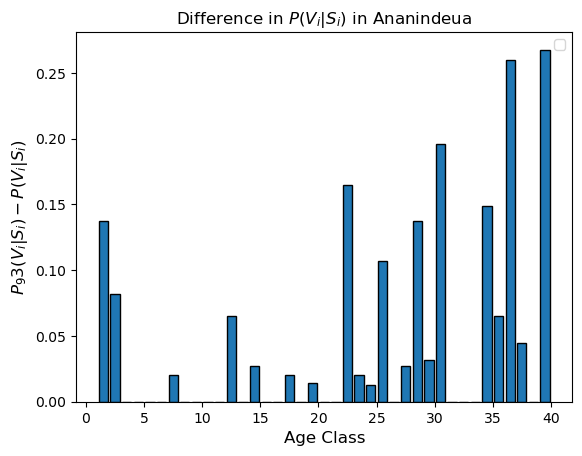

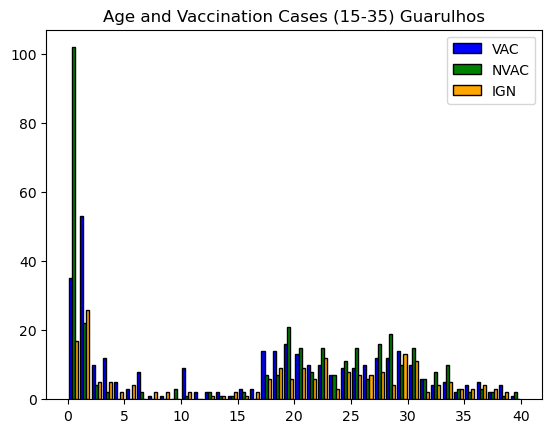

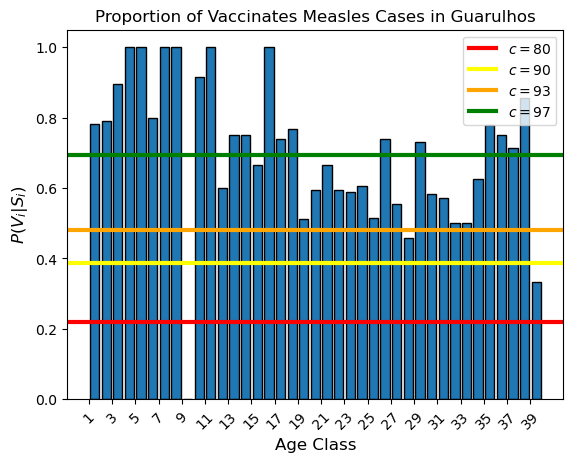

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


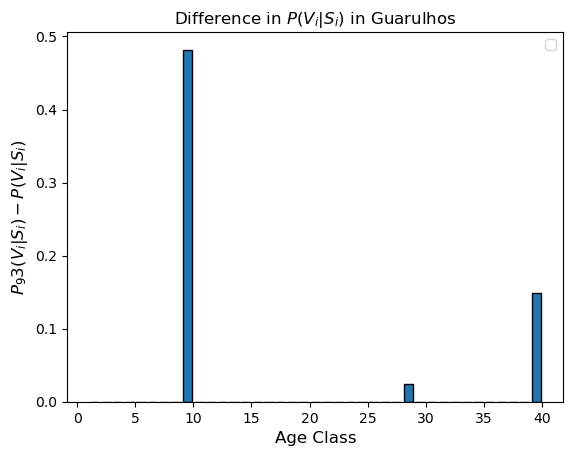

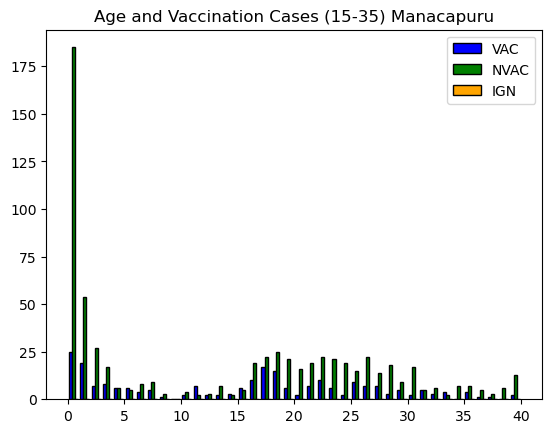

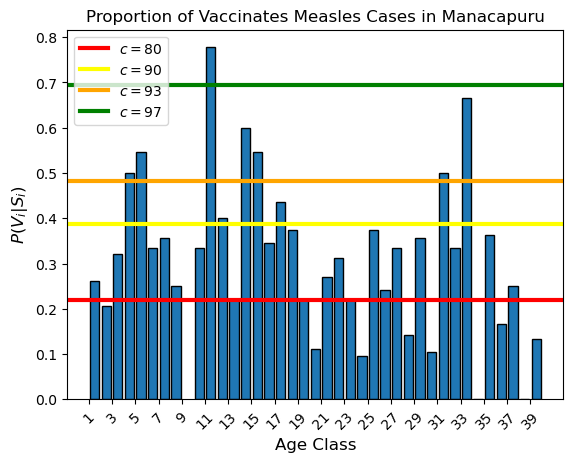

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


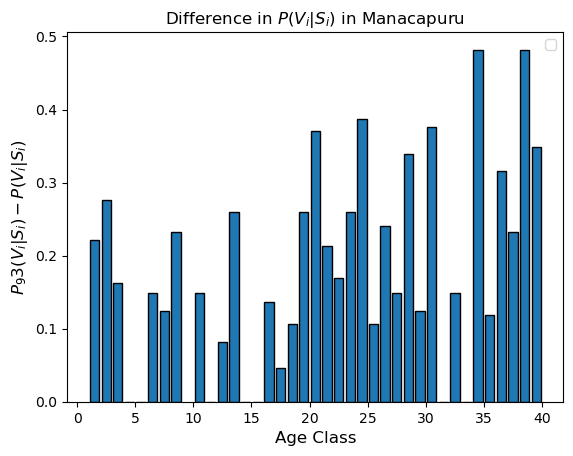

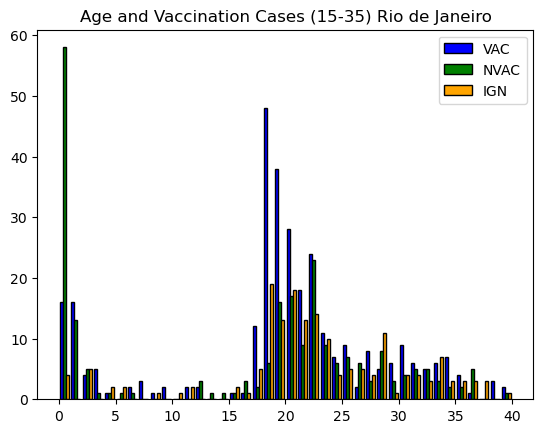

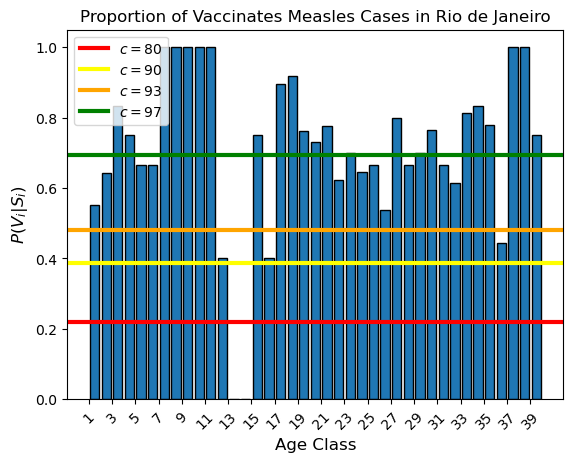

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


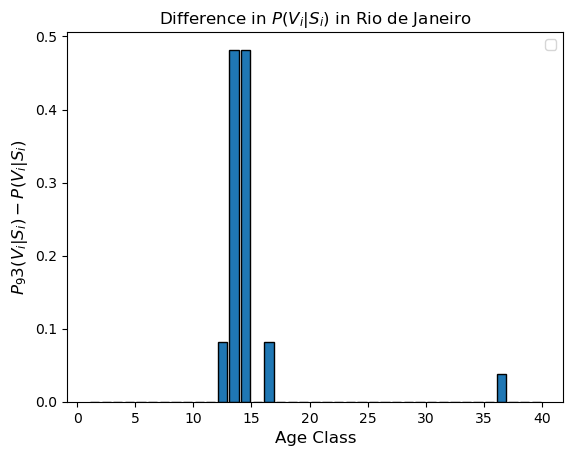

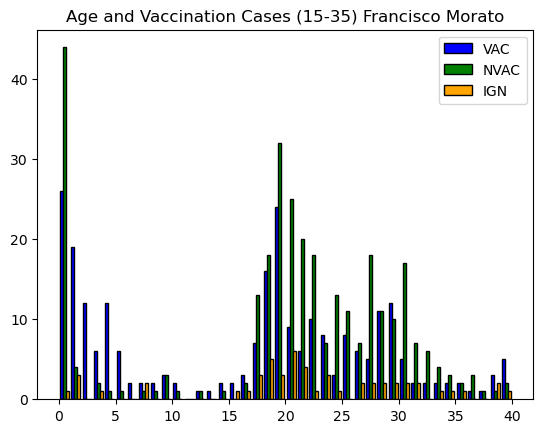

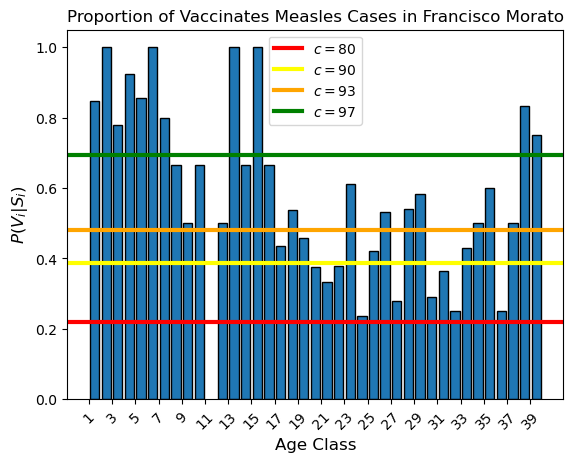

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


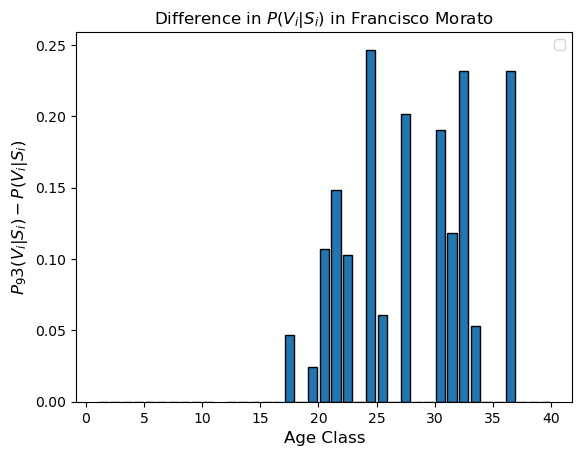

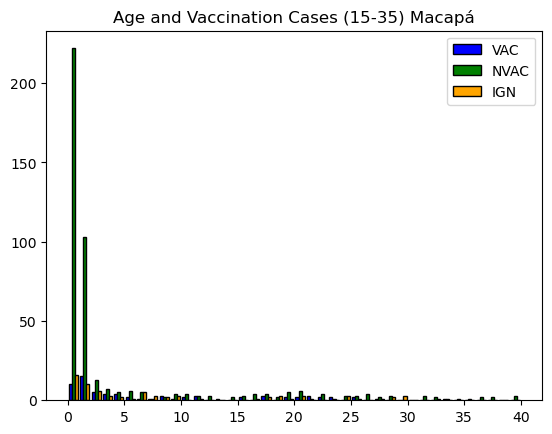

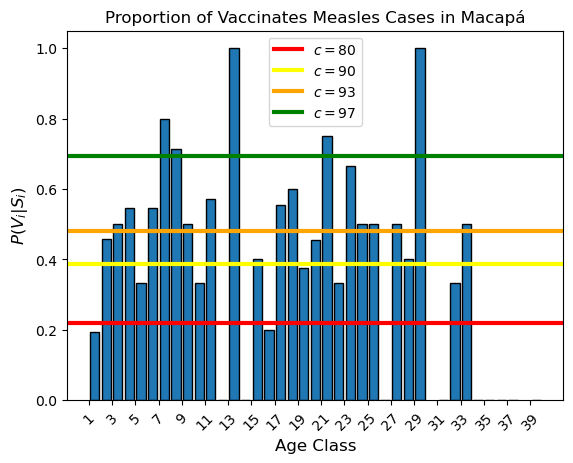

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


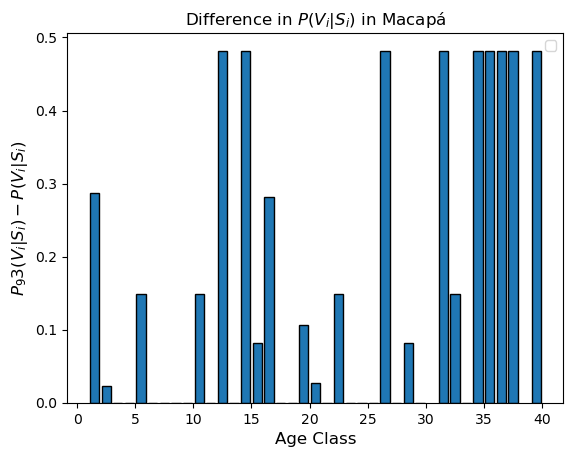

In [8]:
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs = vacs[1:]
    nvacs = nvacs[1:]
    ign = ign[1:]
    vacs = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    p_vacs_93 = (probability_age(0.93,0.93))
    p_vacs_90 = (probability_age(0.9,0.93))
    p_vacs_80 = (probability_age(0.80,0.93))
    p_vacs_97 = (probability_age(0.97,0.93))
    plt.bar(np.arange(1,max_age,1) + 0.5,height = p_vacs, edgecolor = 'k')
    plt.axhline(p_vacs_80, color ='red', linewidth = 3, label = r'$c = 80%$')
    plt.axhline(p_vacs_90, color = 'yellow', linewidth = 3, label = r'$c = 90%$')
    plt.axhline(p_vacs_93, color = 'orange', linewidth = 3, label = r'$c = 93%$')
    plt.axhline(p_vacs_97, color = 'green', linewidth = 3, label = r'$c = 97%$')
    plt.xticks(np.arange(1,max_age,2), rotation = 45)
    plt.xlabel('Age Class', fontsize = 12)
    plt.ylabel(r'$P(V_{i}|S_i)$', fontsize = 12)
    plt.title('Proportion of Vaccinates Measles Cases in '+mun_name)
    plt.legend()
    plt.show()
    p_excess = p_vacs_93 - p_vacs
    f = lambda x: 0 if x < 0 else x
    p_excess = [f(i) for i in p_excess]
    plt.bar(np.arange(1,max_age,1) + 0.5,height = p_excess, edgecolor = 'k')
    plt.xlabel('Age Class', fontsize = 12)
    plt.ylabel(r'$P_93(V_{i}|S_i) - P(V_{i}|S_i)$', fontsize = 12)
    plt.title('Difference in '+r'$P(V_i|S_i)$ '+'in '+mun_name)
    plt.legend()
    plt.show()